In [4]:
import torch
import torchvision 
from torch.utils import data
from torchvision import transforms

import matplotlib.pyplot as plt

import time
import sys
sys.path.append('..')
from d2l_helpers import *

In [17]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="./data", train=True, transform = trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="./data", train=False, transform = trans, download=True)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [18]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [19]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])

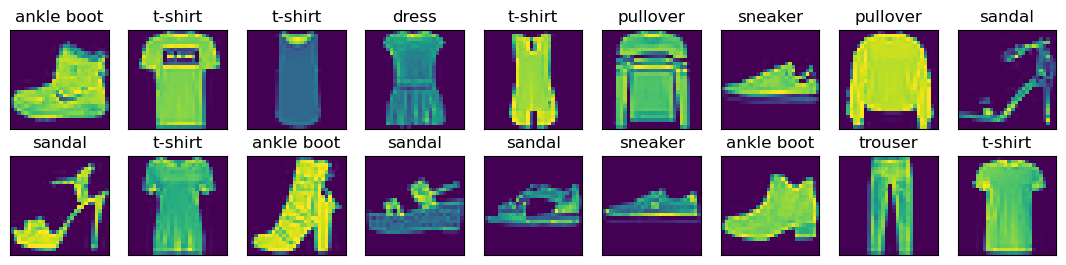

In [20]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [21]:
# batch_size = 256

# train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

# start = time.time()
# for X, y in train_iter:
#     continue
# print('%.2f sec' % (time.time() - start))

In [22]:
# softmax regression main body

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [23]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [24]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [25]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [26]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [27]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [28]:
accuracy(y_hat, y) / len(y)

0.5

In [29]:
lr = 0.1

def updater(batch_size):
    return sgd([W, b], lr, batch_size)

In [30]:
num_epochs = 10
train_softmax(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custom optimizer
Using custo

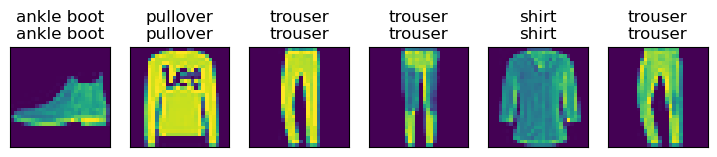

In [31]:
def predict_softmax(net, test_iter, n=6):  #@save
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_softmax(net, test_iter)